# Self Organizing Map



## General remark

This SOM Implementation provides some different neighborhood functions and learning rate schedules.

The provided implementations are listed below:

1.) Learning rate schedules for step $t$:
* Linear (`learning='linear'`): $\alpha(t) = \alpha_0 * \frac{1}{t} $
* Inverse of time (`learning='inv'`): $\alpha(t) = \alpha_0 * (1 - \frac{t}{t_{max}})$
* Power (`learning='power'`): $\alpha(t) = \alpha_0 * exp( \frac{t}{t_{max}})$

2.) Neighborhood functions:
* Gaussian (`neighborhood='gaussian'`): $h_{ij}^{c}(t) = exp(- \frac{||{r_i - r_c}||^2}{2 \sigma^2(t)})$
* Bubble (`neighborhood='bubble'`): $ h_{ij}^{c}(t) = \begin{cases}\alpha(t), & (i,j) \in N_{c} \\0 & else \end{cases}$



**Hint: choose a large alpha (e.g 0.9 or 1.0) if you want to use the bubble neighborhood function.**

## RGB Example

This rgb example is used to test the functionality of my implementation


SOM trained in: 149.88 seconds


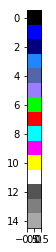

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import SOM as som

color_som = som.SOM(map_shape=(20,30), 
                    input_dimensions=3, 
                    init_alpha=.01, # For bubble in [0.0, 1.0]
                    init_sigma=5.5, 
                    max_iterations=10000,
                    learning='inv',
                    neighborhood='gaussian')

colors = np.array(
         [[[0., 0., 0.]],
          [[0., 0., 1.]],
          [[0., 0., 0.5]],
          [[0.125, 0.529, 1.0]],
          [[0.33, 0.4, 0.67]],
          [[0.6, 0.5, 1.0]],
          [[0., 1., 0.]],
          [[1., 0., 0.]],
          [[0., 1., 1.]],
          [[1., 0., 1.]],
          [[1., 1., 0.]],
          [[1., 1., 1.]],
          [[.33, .33, .33]],
          [[.5, .5, .5]],
          [[.66, .66, .66]]])

# store the names of the colors for visualization later on
color_names = np.array(['black', 'blue', 'darkblue', 'skyblue',
         'greyblue', 'lilac', 'green', 'red',
         'cyan', 'violet', 'yellow', 'white',
         'darkgrey', 'mediumgrey', 'lightgrey'])


plt.imshow(colors)
color_map = color_som.fit(colors, color_names)

## Visualization of the RGB-SOM

The weightage matrix of the som is used to plot the colors. The labels are plotted at the location of their best matching unit.

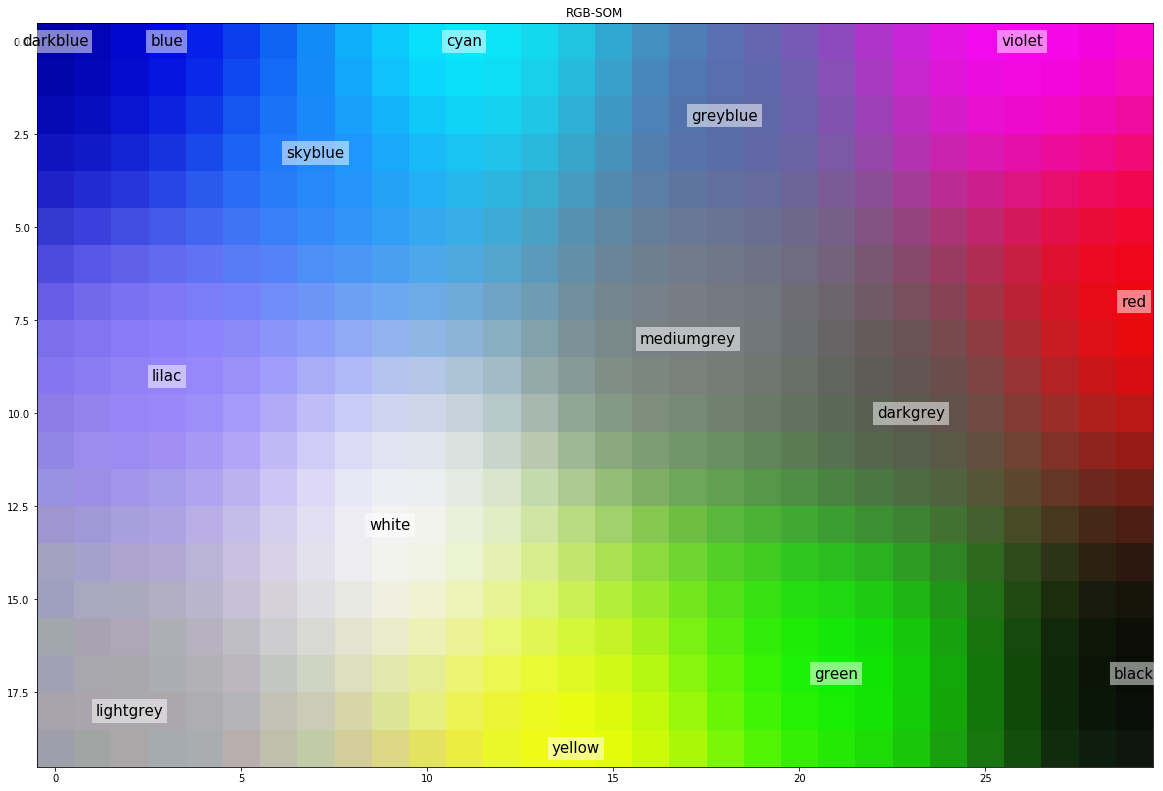

In [28]:
plt.figure(figsize=(20, 30))

plt.imshow(color_som.weights)
plt.title("RGB-SOM")
for i, txt in enumerate(color_names):
    bmu = color_som.find_bmu(colors[i])
    plt.text(bmu[1], bmu[0], color_names[i], fontsize=15, ha='center', va='center',
           bbox=dict(facecolor='white', alpha=0.5, lw=0))